In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. <-- this list stores the random lattitude 
#and longitudes, so that it doesn't need to be generated multiple times. 
coordinates = list(lat_lngs)

In [4]:
# import citypy to see what cities fall near the longitude, latitude cooredinate. 
# Use the citipy module to determine city based on latitude and logitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and logitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

618

### Import Requests Library and weather_api_key

In [6]:
# Import requests
import requests

# Import the API key. 
from config import weather_api_key

### Build the basic URL for the OpenWeatherMap with the weather_api_key

In [7]:
# Starting URL from the WeatherMap API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

### Build emply cell to hold data and construct the data retrieval

In [9]:
# Creat an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop through the List of Cities and Build the City URL

In [10]:
# # Loop through all the cities in our list. 
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city. 
#     city_url = url +"&q=" + cities[i]

### COMMENTED THIS OUT SINCE THIS WILL GIVE ERRORS WHEN BUILDING CITY_URL. IT ADDS THE INDEX
### NOT THE CITY NAME TO THE CITY_URL. TRY THE INSTEAD THE CELL BELOW.

In [11]:
# Loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    #Group cities in set of 50 for logging purposes.
    if (i %  50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:S')
        
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping ...")
        pass
    
# Indicate that the Data Loading is complete.
print("---------------------------------")
print("Data Retrieval Complete          ")
print("---------------------------------")

Processing Record1 of Set 1 | les cayes
Processing Record2 of Set 1 | albany
Processing Record3 of Set 1 | halalo
City not found. Skipping ...
Processing Record4 of Set 1 | sisimiut
Processing Record5 of Set 1 | broken hill
Processing Record6 of Set 1 | alegrete
Processing Record7 of Set 1 | uray
Processing Record8 of Set 1 | iqaluit
Processing Record9 of Set 1 | koltubanovskiy
Processing Record10 of Set 1 | punta arenas
Processing Record11 of Set 1 | cherskiy
Processing Record12 of Set 1 | rikitea
Processing Record13 of Set 1 | busselton
Processing Record14 of Set 1 | missoula
Processing Record15 of Set 1 | ushuaia
Processing Record16 of Set 1 | lebu
Processing Record17 of Set 1 | rosarito
Processing Record18 of Set 1 | mocambique
City not found. Skipping ...
Processing Record19 of Set 1 | rawson
Processing Record20 of Set 1 | bethel
Processing Record21 of Set 1 | tsihombe
City not found. Skipping ...
Processing Record22 of Set 1 | utiroa
City not found. Skipping ...
Processing Record

Processing Record42 of Set 4 | ust-ilimsk
Processing Record43 of Set 4 | fontenay-le-comte
Processing Record44 of Set 4 | imeni poliny osipenko
Processing Record45 of Set 4 | mount gambier
Processing Record46 of Set 4 | santa clarita
Processing Record47 of Set 4 | rocha
Processing Record48 of Set 4 | lagoa
Processing Record49 of Set 4 | rajshahi
Processing Record50 of Set 4 | illoqqortoormiut
City not found. Skipping ...
Processing Record1 of Set 5 | great yarmouth
Processing Record2 of Set 5 | solovetskiy
City not found. Skipping ...
Processing Record3 of Set 5 | gambela
Processing Record4 of Set 5 | komsomolskiy
Processing Record5 of Set 5 | barquisimeto
Processing Record6 of Set 5 | potrerillos
Processing Record7 of Set 5 | ilulissat
Processing Record8 of Set 5 | gogaran
Processing Record9 of Set 5 | burica
City not found. Skipping ...
Processing Record10 of Set 5 | biak
Processing Record11 of Set 5 | belushya guba
City not found. Skipping ...
Processing Record12 of Set 5 | ippy
Pro

Processing Record33 of Set 8 | ijui
Processing Record34 of Set 8 | ried
Processing Record35 of Set 8 | darnah
Processing Record36 of Set 8 | dordrecht
Processing Record37 of Set 8 | buta
Processing Record38 of Set 8 | potosi
Processing Record39 of Set 8 | bage
Processing Record40 of Set 8 | lukulu
Processing Record41 of Set 8 | margate
Processing Record42 of Set 8 | djibo
Processing Record43 of Set 8 | mataram
Processing Record44 of Set 8 | sioux lookout
Processing Record45 of Set 8 | kahului
Processing Record46 of Set 8 | carolina
Processing Record47 of Set 8 | mercedes
Processing Record48 of Set 8 | topolobampo
Processing Record49 of Set 8 | avera
Processing Record50 of Set 8 | charyshskoye
Processing Record1 of Set 9 | muleba
Processing Record2 of Set 9 | gagarin
Processing Record3 of Set 9 | dourados
Processing Record4 of Set 9 | warqla
City not found. Skipping ...
Processing Record5 of Set 9 | teknaf
Processing Record6 of Set 9 | kambove
Processing Record7 of Set 9 | puerto colomb

Processing Record25 of Set 12 | quibdo
Processing Record26 of Set 12 | liseleje
Processing Record27 of Set 12 | tomatlan
Processing Record28 of Set 12 | iberia
Processing Record29 of Set 12 | borba
Processing Record30 of Set 12 | guane
Processing Record31 of Set 12 | pedernales
Processing Record32 of Set 12 | padang
Processing Record33 of Set 12 | yarmouth
Processing Record34 of Set 12 | tuatapere
Processing Record35 of Set 12 | thinadhoo
Processing Record36 of Set 12 | eyl
Processing Record37 of Set 12 | slave lake
Processing Record38 of Set 12 | cooma
Processing Record39 of Set 12 | inuvik
Processing Record40 of Set 12 | chumikan
Processing Record41 of Set 12 | kula
Processing Record42 of Set 12 | jalu
Processing Record43 of Set 12 | gelemso
Processing Record44 of Set 12 | hasaki
Processing Record45 of Set 12 | maniitsoq
Processing Record46 of Set 12 | mount pleasant
Processing Record47 of Set 12 | kobojango
City not found. Skipping ...
Processing Record48 of Set 12 | dawei
Processin

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Les Cayes,18.2000,-73.7500,83.05,73,16,4.92,HT,2021-08-07 13:47:S
1,Albany,42.6001,-73.9662,78.80,81,100,2.42,US,2021-08-07 13:47:S
2,Sisimiut,66.9395,-53.6735,41.97,92,100,4.72,GL,2021-08-07 13:47:S
3,Broken Hill,-31.9500,141.4333,49.71,62,0,10.36,AU,2021-08-07 13:47:S
4,Alegrete,-29.7831,-55.7919,73.60,53,0,13.29,BR,2021-08-07 13:47:S
5,Uray,60.1247,64.7758,61.70,98,100,5.23,RU,2021-08-07 13:47:S
6,Iqaluit,63.7506,-68.5145,46.13,81,90,14.97,CA,2021-08-07 13:47:S
7,Koltubanovskiy,52.9407,52.0269,84.40,27,10,5.93,RU,2021-08-07 13:47:S
8,Punta Arenas,-53.1500,-70.9167,35.62,93,75,35.68,CL,2021-08-07 13:47:S
9,Cherskiy,68.7500,161.3000,51.51,55,100,7.00,RU,2021-08-07 13:47:S


### Reorder the columns to put the customer interest first. 

In [13]:
# Reorder the DataFrame
new_city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [14]:
new_city_data_df = city_data_df[new_city_data_order]
new_city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Les Cayes,HT,2021-08-07 13:47:S,18.2000,-73.7500,83.05,73,16,4.92
1,Albany,US,2021-08-07 13:47:S,42.6001,-73.9662,78.80,81,100,2.42
2,Sisimiut,GL,2021-08-07 13:47:S,66.9395,-53.6735,41.97,92,100,4.72
3,Broken Hill,AU,2021-08-07 13:47:S,-31.9500,141.4333,49.71,62,0,10.36
4,Alegrete,BR,2021-08-07 13:47:S,-29.7831,-55.7919,73.60,53,0,13.29
5,Uray,RU,2021-08-07 13:47:S,60.1247,64.7758,61.70,98,100,5.23
6,Iqaluit,CA,2021-08-07 13:47:S,63.7506,-68.5145,46.13,81,90,14.97
7,Koltubanovskiy,RU,2021-08-07 13:47:S,52.9407,52.0269,84.40,27,10,5.93
8,Punta Arenas,CL,2021-08-07 13:47:S,-53.1500,-70.9167,35.62,93,75,35.68
9,Cherskiy,RU,2021-08-07 13:47:S,68.7500,161.3000,51.51,55,100,7.00


### Create a CSV File

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the new_city_data_df into a csv file
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

### Plot the Data at Current Time (need to import time module)

In [16]:
# Extract relevant fields from DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [17]:
# Import the time module PRACTICE WITH TIME MODULE
#import time
#Get today's date in seconds.
# today = time.strftime("%x")
# today

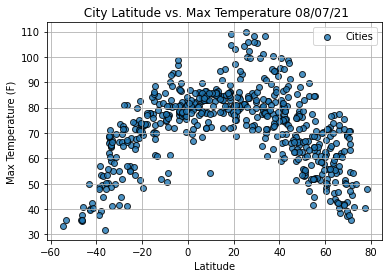

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f" City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
plt.legend()

# Show plot
plt.show()

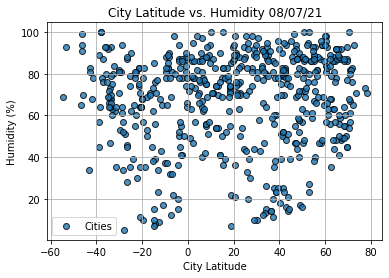

In [19]:
# Scatter plot of latitude vs. Humidity
plt.scatter(lats, humidity,
            edgecolor = "black", linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel(f"City Latitude")
plt.ylabel(f"Humidity (%)")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()
          

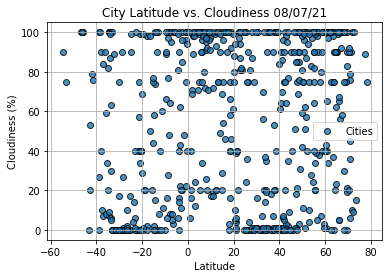

In [20]:
# Plot Latitude vs. Cloudiness
plt.scatter(lats, cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()
#Save figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

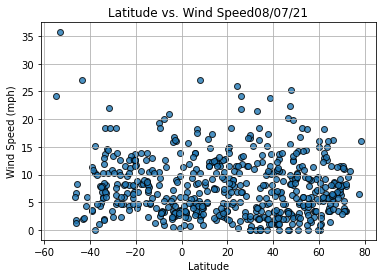

In [21]:
# Plot Latitude vs. Wind Speed.
plt.scatter(lats, wind_speed, 
           edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")
plt.title("Latitude vs. Wind Speed" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()

### Regression Analysis of four weather parameters as a function of latitude

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data.
# and plot a regression line and the equation with the data. 
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calcualte the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line. 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and lot the regression line. 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()
    

In [23]:
index13 = new_city_data_df.loc[13]

In [24]:
new_city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
558     True
559    False
560     True
561    False
562    False
Name: Lat, Length: 563, dtype: bool

### Create the Hemisphere DataFrame

In [25]:
# Create Nothern hemisphere DataFrame
northern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] >= 0)]
northern_hemi_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
554,Oksfjord,NO,2021-08-07 13:49:S,70.2396,22.3479,70.72,54,92,2.91
555,Celestun,MX,2021-08-07 13:49:S,20.8667,-90.4000,81.00,76,6,8.43
557,Hamilton,US,2021-08-07 13:45:S,39.1834,-84.5333,78.24,78,1,1.01
558,Sayanogorsk,RU,2021-08-07 13:50:S,53.0875,91.3997,63.28,80,99,5.91
560,Hohoe,GH,2021-08-07 13:50:S,7.1518,0.4736,83.97,63,80,8.41


In [26]:
# Create Southern hemisphere DataFrame
southern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Broken Hill,AU,2021-08-07 13:47:S,-31.9500,141.4333,49.71,62,0,10.36
4,Alegrete,BR,2021-08-07 13:47:S,-29.7831,-55.7919,73.60,53,0,13.29
8,Punta Arenas,CL,2021-08-07 13:47:S,-53.1500,-70.9167,35.62,93,75,35.68
10,Rikitea,PF,2021-08-07 13:47:S,-23.1203,-134.9692,73.80,80,6,8.05
11,Busselton,AU,2021-08-07 13:47:S,-33.6500,115.3333,59.09,93,100,18.37


### Perform Linear Regression on the Max.Temp for the Northern Hemisphere

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n
                      for Maximum Temperature', 'Max Temp (F)', (10,40))


SyntaxError: EOL while scanning string literal (Temp/ipykernel_18516/2653424185.py, line 6)

### Perform Linear Regression on the Max Temp for the Sothern Hemisphere

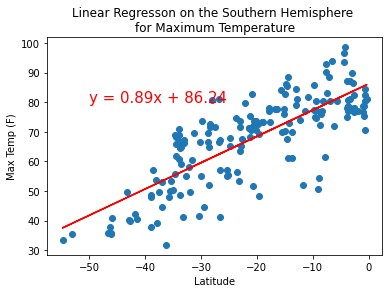

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the fuction. 
plot_linear_regression(x_values, y_values, 
                      'Linear Regresson on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp (F)', (-50, 80))

### Perform Linear Regression on the Percent Humidity for the N. & S. Hemisphere

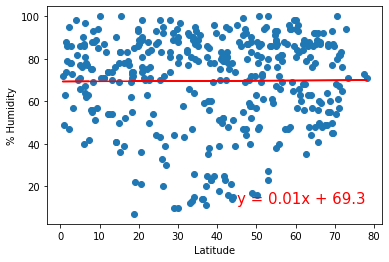

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function plot_linear_regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (45, 12))

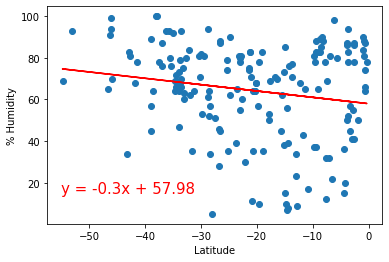

In [30]:
# Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function plot_linear_regression
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', "% Humidity", (-55, 15))

### Perform Linear Regression on the Percent Cloudiness for the N. & S. Hemisphere

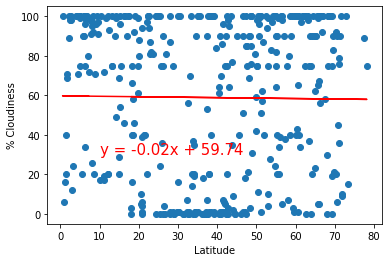

In [31]:
# Linear Regression on percent cloudiness for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,"%Cloudiness vs Latitude \
                for Northern Hemisphere" ,"% Cloudiness", (10, 30))


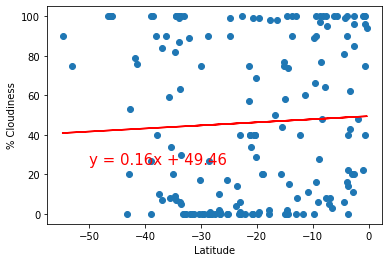

In [32]:
# Linear Regression on Pecent Cloudiness for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot
plot_linear_regression(x_values, y_values, 
                      '% Cloudiness vs. Latiture for Southern \
                      Hemisphere', "% Cloudiness", (-50, 25))

### # Find Correletation between Latitude and Wind Speed N. and S. Hemisphere

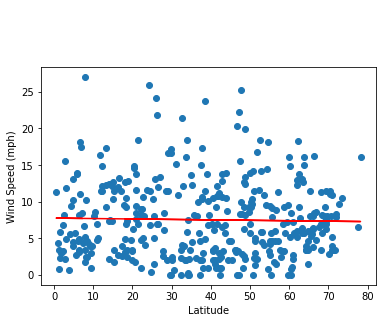

In [33]:
# Find Correletation between Latitude and Wind Speed Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the regression function to plot
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the \
                       Northern Hemisphere for Wind Speed", 'Wind Speed (mph)',(40,35))


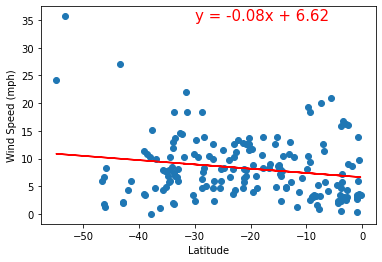

In [34]:
# Find the correclation between the latitude and the wind speed in S. Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the plot_regresson function
plot_linear_regression(x_values, y_values, 
                      "Correlation between Latitudes and Wind Speed \
                       for the Southern Hemisphere", "Wind Speed (mph)", (-30,35))